In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import regex as re

In [2]:
fifa=pd.read_csv('fifa_clean.csv')

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fifa.head()

sofifa_id         short_name player_positions  overall  potential  \
0     158023           L. Messi               RW       93         93   
1     188545     R. Lewandowski               ST       92         92   
2      20801  Cristiano Ronaldo               ST       91         91   
3     190871          Neymar Jr               LW       91         91   
4     192985       K. De Bruyne               CM       91         91   

     value_eur  wage_eur  age         dob  height_cm  ...  lb  lcb  cb rcb  \
0   78000000.0  320000.0   34  1987-06-24        170  ...  61   50  50  50   
1  119500000.0  270000.0   32  1988-08-21        185  ...  61   60  60  60   
2   45000000.0  270000.0   36  1985-02-05        187  ...  60   53  53  53   
3  129000000.0  270000.0   29  1992-02-05        175  ...  62   50  50  50   
4  125500000.0  350000.0   30  1991-06-28        181  ...  75   69  69  69   

   rb  gk  log_value_eur log_wage_eur work_rate_attacking  \
0  61  19      18.172219    12.676076                   2   
1  61  19      18.598827    12.506177                   3   
2  60  20      17.622173    12.506177                   3   
3  62  20      18.675323    12.506177                   3   
4  75  21      18.647816    12.765688                   3   

   work_rate_deffensive  
0                     1  
1                     2  
2                     1  
3                     2  
4                     3  

[5 rows x 98 columns]

#### elimino las dos columnas de log que cree adrede para hacer un plot

In [4]:
fifa.drop(['log_value_eur','log_wage_eur'],axis=1,inplace=True)

In [5]:
fifa.dtypes

sofifa_id                int64
short_name              object
player_positions        object
overall                  int64
potential                int64
                         ...  
rcb                      int64
rb                       int64
gk                       int64
work_rate_attacking      int64
work_rate_deffensive     int64
Length: 96, dtype: object

In [6]:
fifa.shape

(19165, 96)

#### busqueda de correlaciones

In [7]:
plt.rcParams['figure.figsize'] = (40, 40)

<AxesSubplot:>

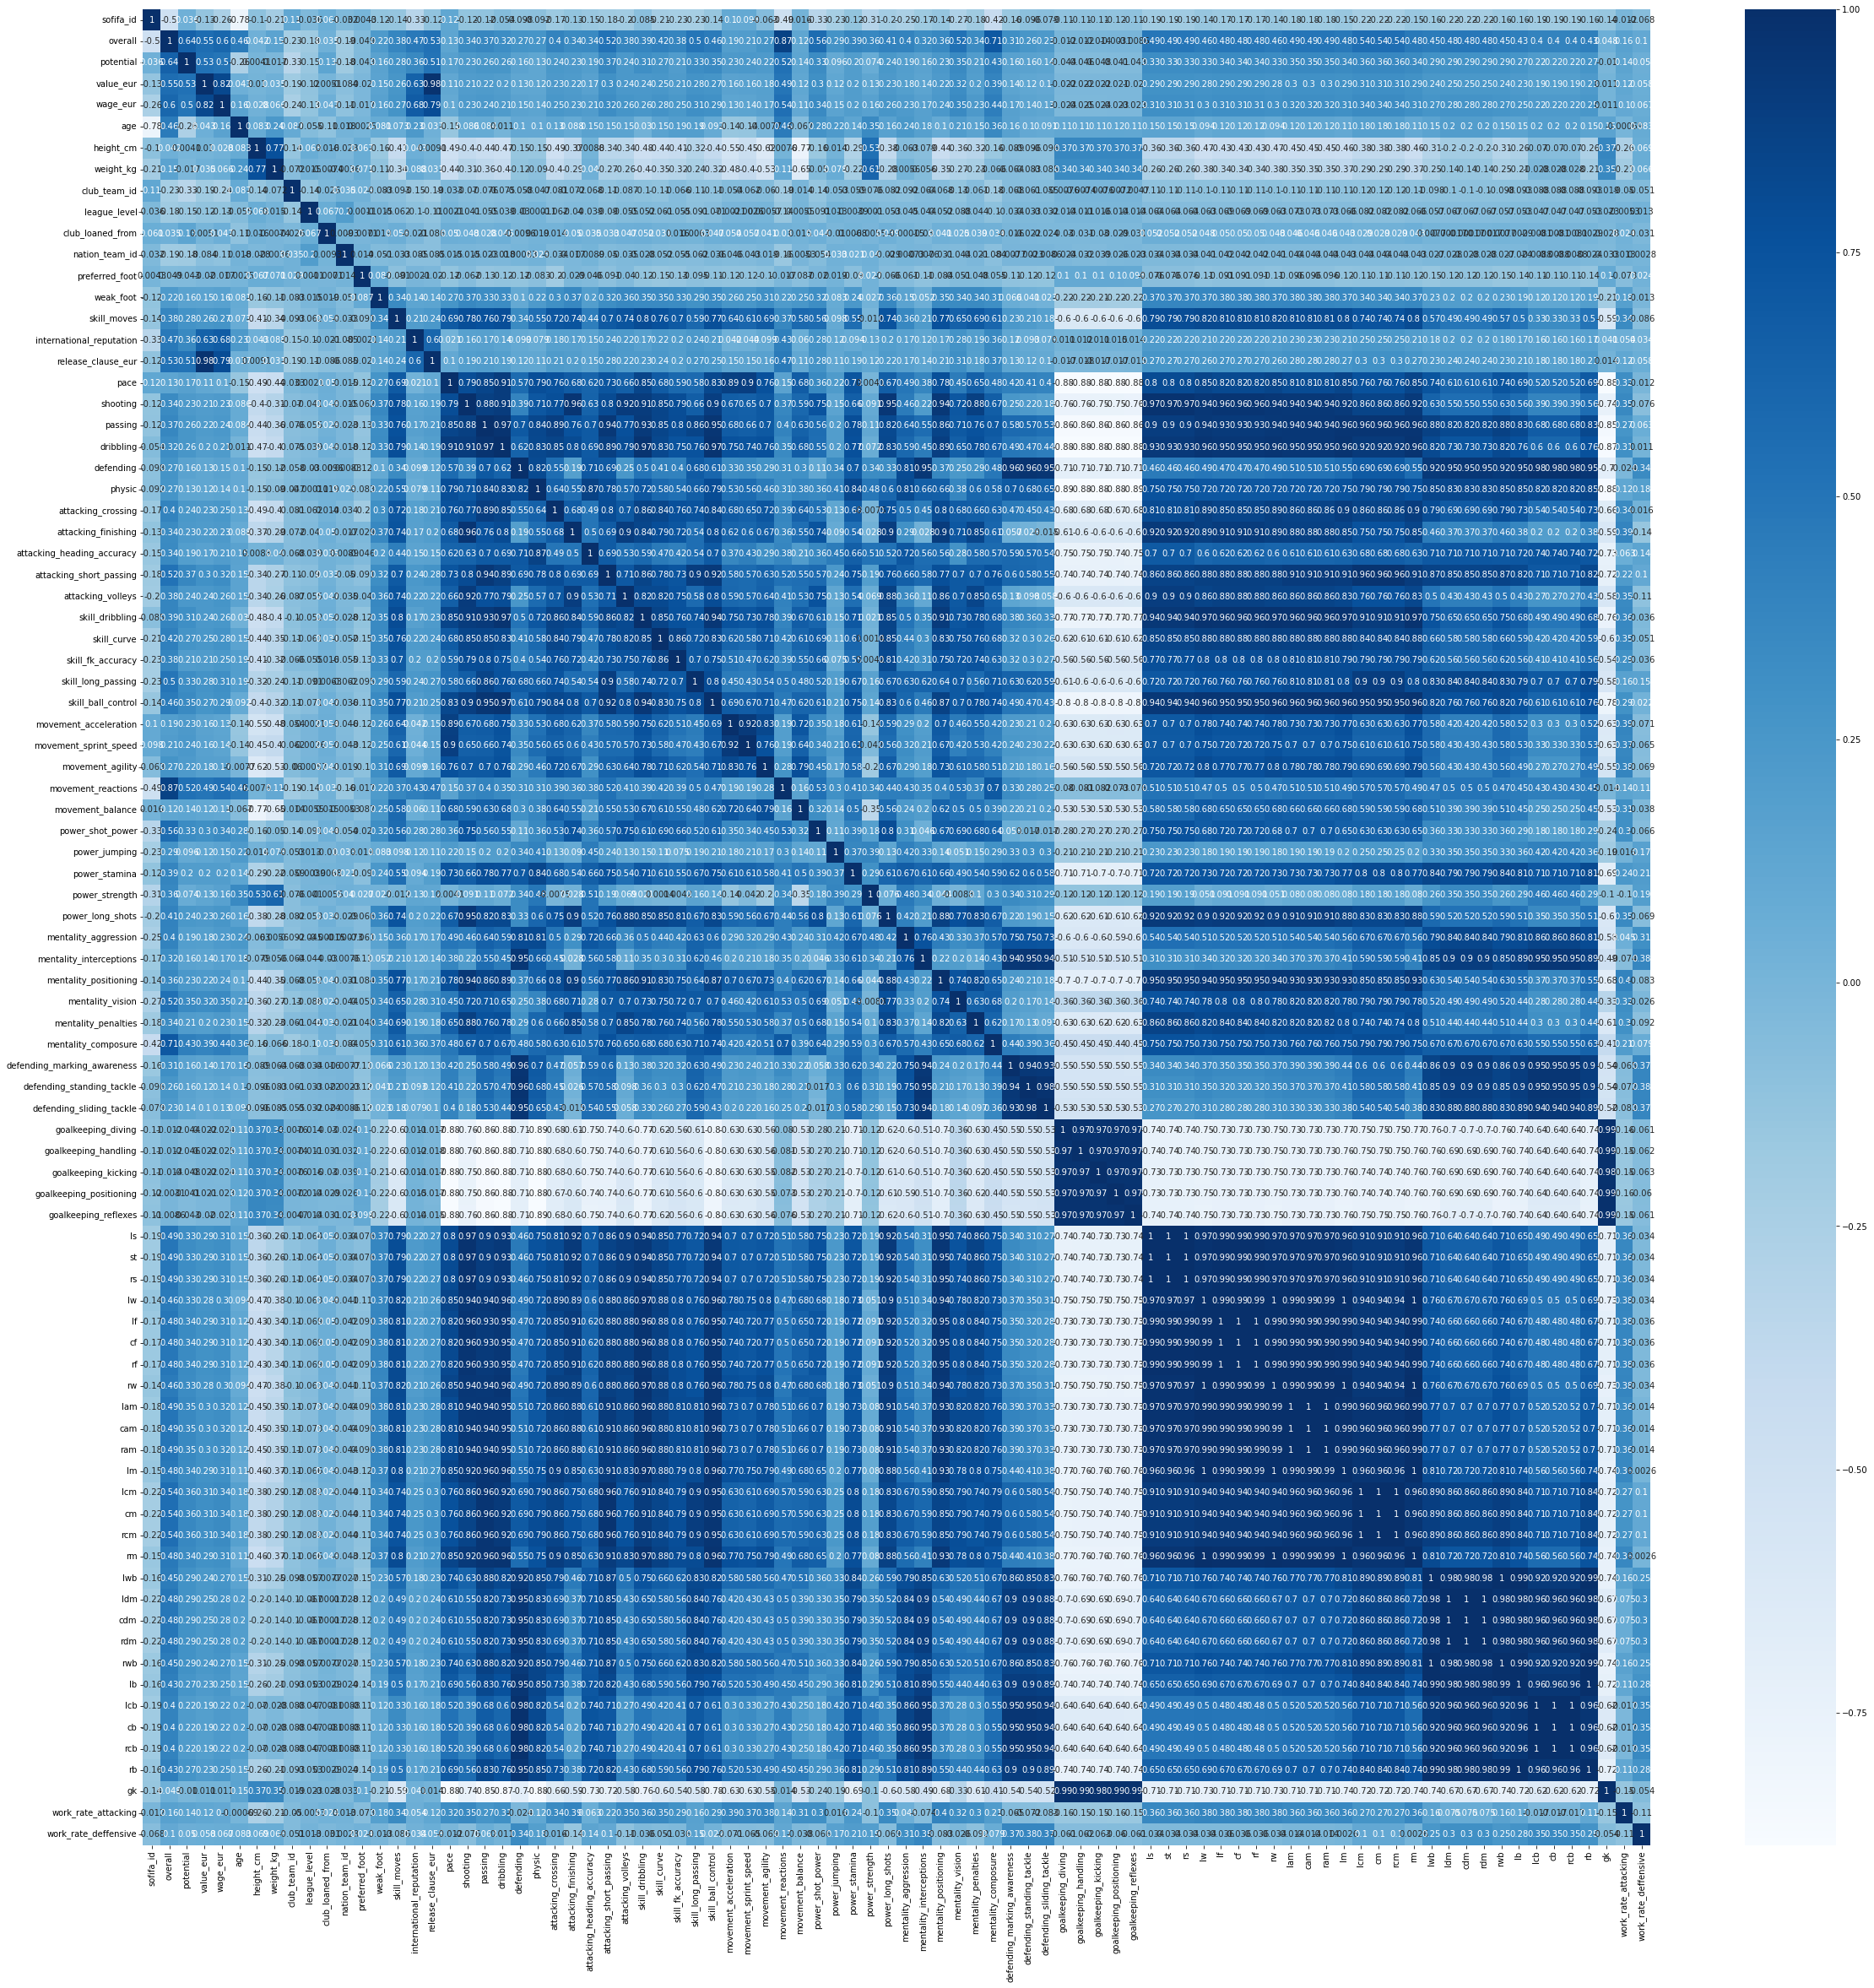

In [8]:
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

#### demasiadas variables. Nos centramos primero en las que muestran colinearlidad

<AxesSubplot:>

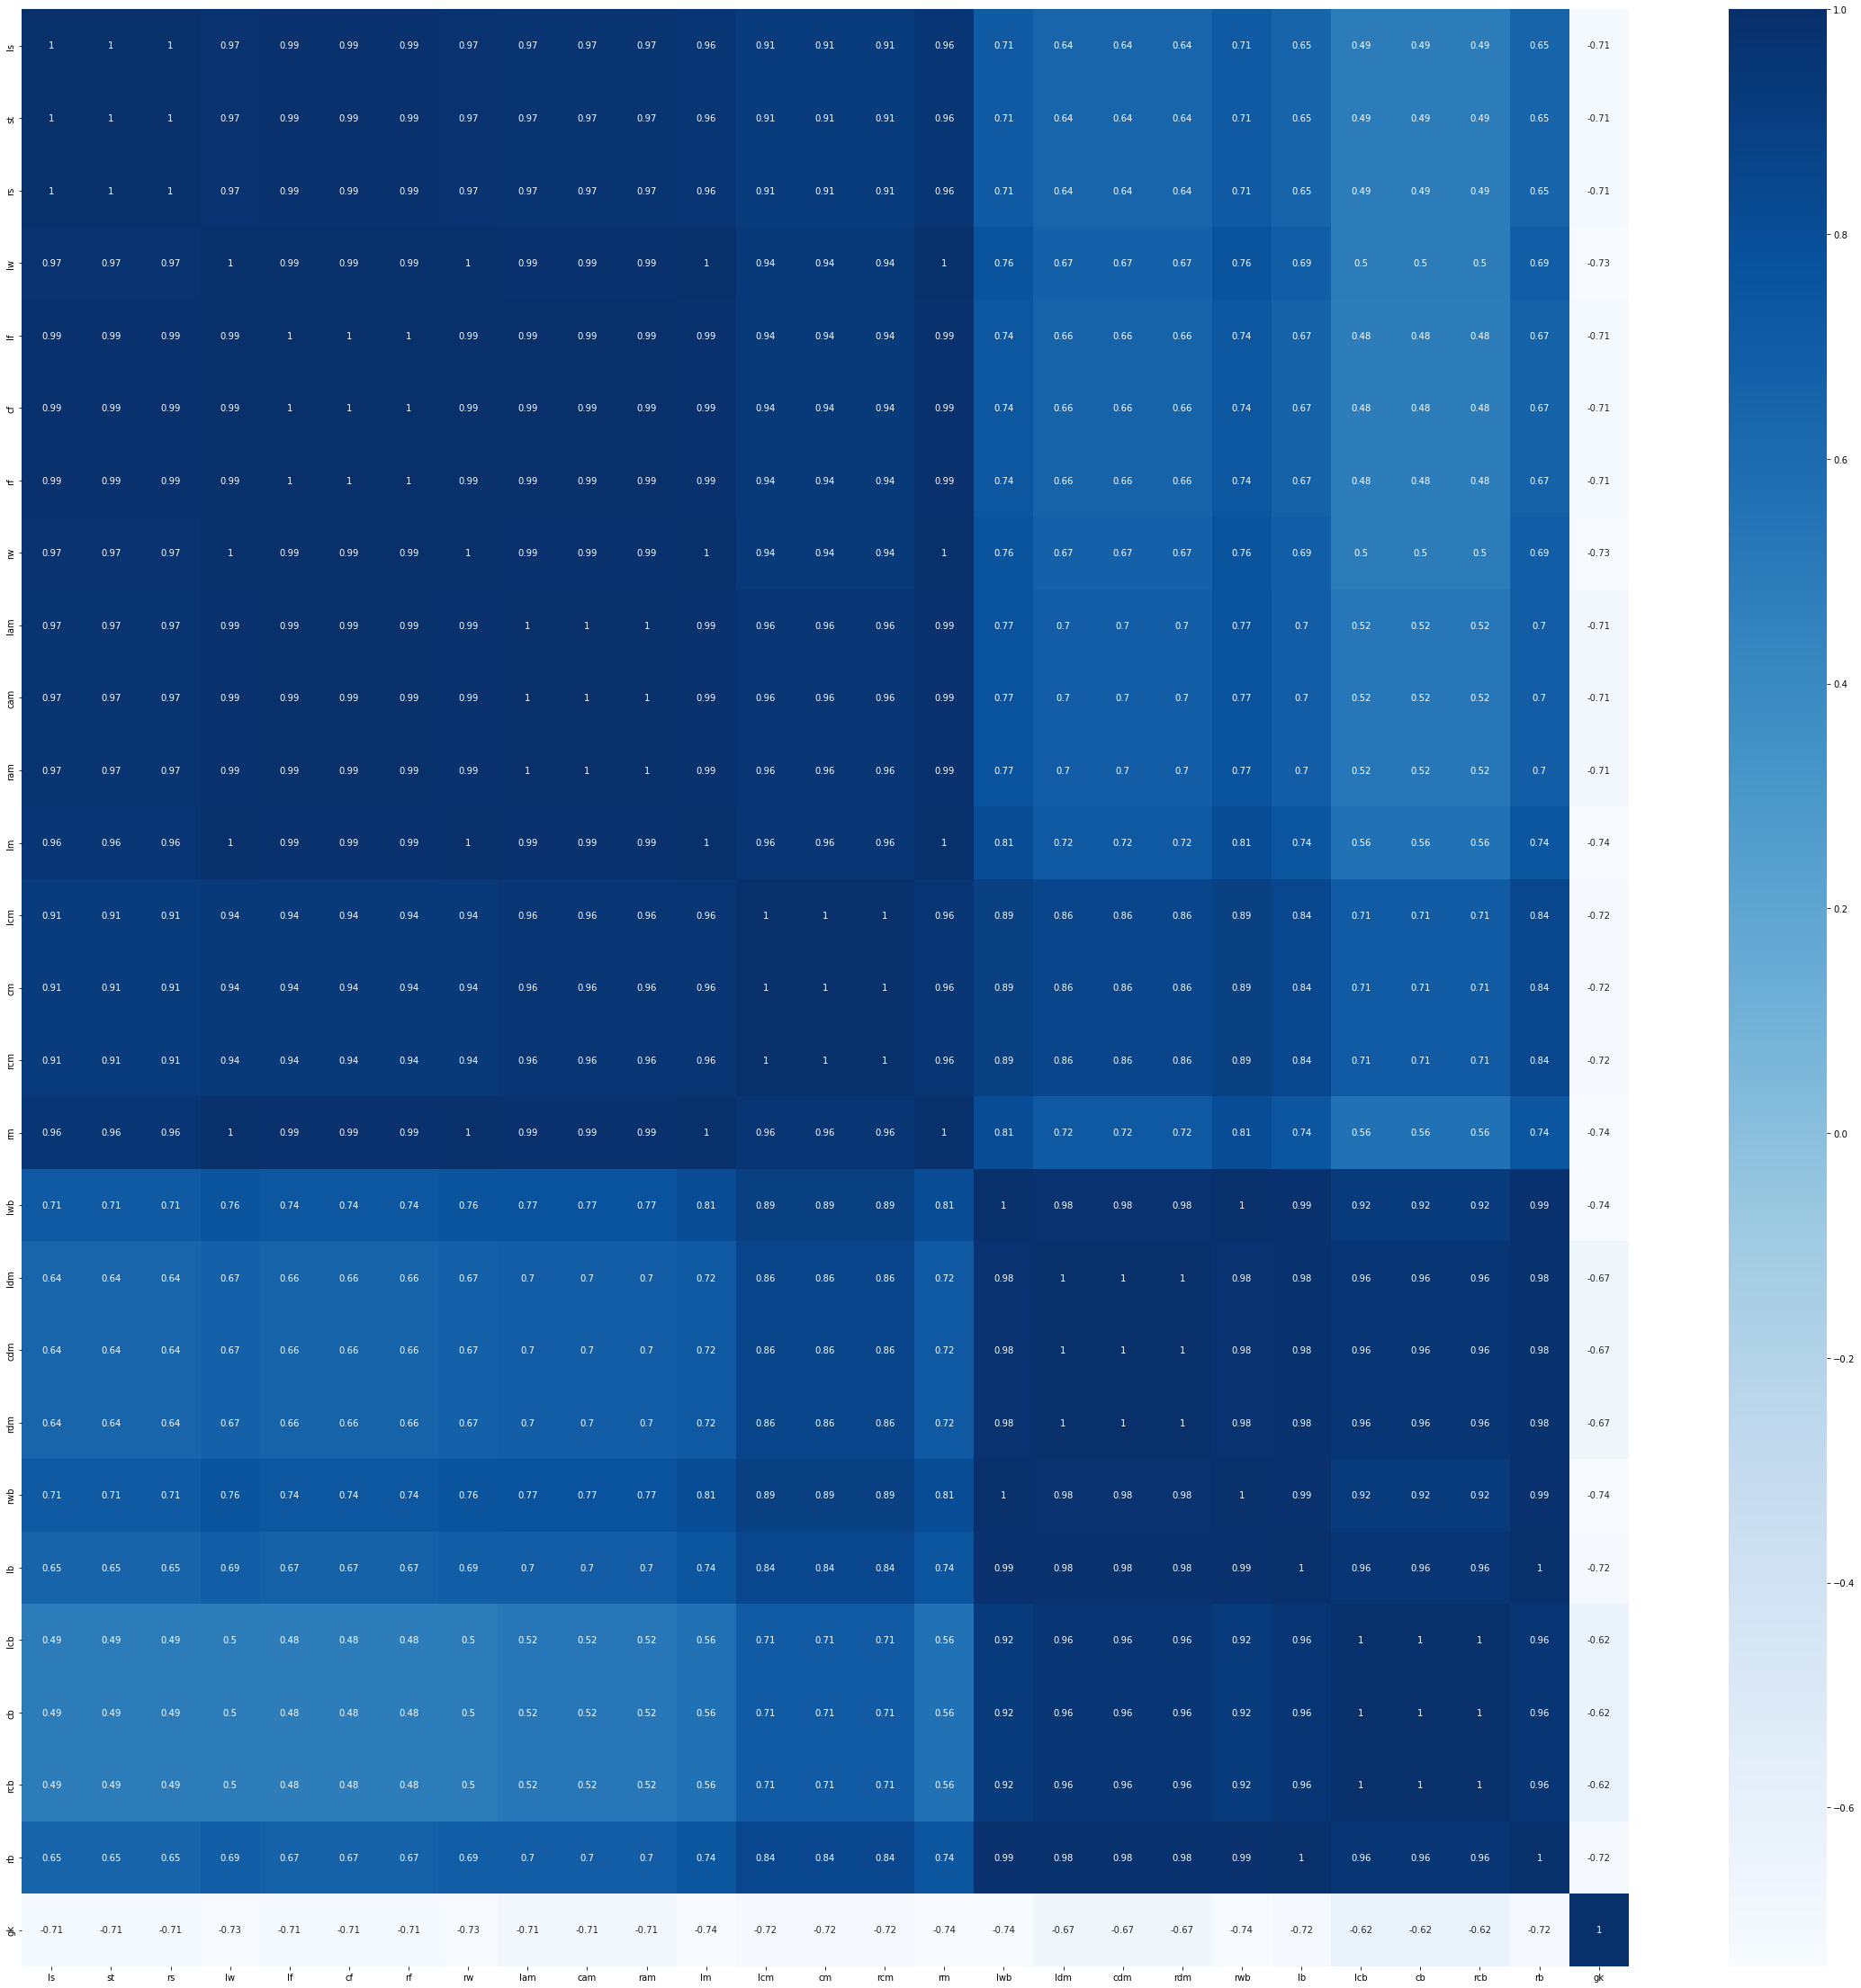

In [9]:
sns.heatmap(fifa[['ls','st','rs','lw','lf','cf','rf','rw','lam',
                      'cam','ram','lm','lcm','cm','rcm','rm','lwb',
                      'ldm','cdm','rdm','rwb','lb','lcb','cb',
                      'rcb','rb','gk']].corr(),cmap='Blues', annot=True)

In [10]:
## hay bloques claros de 3x3 con colinearlidad

In [11]:
## revisamos ls, st y rs

In [12]:
(fifa.ls == fifa.st).value_counts()

True    19165
dtype: int64

In [13]:
(fifa.ls == fifa.rs).value_counts()

True    19165
dtype: int64

In [14]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [15]:
fifa.drop(['ls','rs'],axis=1,inplace=True)

In [16]:
## revisamos lf, cf y rf

In [17]:
(fifa.lf == fifa.rf).value_counts()

True    19165
dtype: int64

In [18]:
(fifa.lf == fifa.cf).value_counts()

True    19165
dtype: int64

In [19]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [20]:
fifa.drop(['lf','rf'],axis=1,inplace=True)

In [21]:
## revisamos ram, cac y lam

In [22]:
(fifa.lam == fifa.ram).value_counts()

True    19165
dtype: int64

In [23]:
(fifa.cam == fifa.ram).value_counts()

True    19165
dtype: int64

In [24]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [25]:
fifa.drop(['lam','ram'],axis=1,inplace=True)

In [26]:
## revisamos rcm, cm y lcm

In [27]:
(fifa.rcm == fifa.lcm).value_counts()

True    19165
dtype: int64

In [28]:
(fifa.rcm == fifa.cm).value_counts()

True    19165
dtype: int64

In [29]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [30]:
fifa.drop(['lcm','rcm'],axis=1,inplace=True)

In [31]:
## revisamos rdm, cdm y ldm

In [32]:
(fifa.rdm == fifa.ldm).value_counts()

True    19165
dtype: int64

In [33]:
(fifa.rdm == fifa.cdm).value_counts()

True    19165
dtype: int64

In [34]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [35]:
fifa.drop(['rdm','ldm'],axis=1,inplace=True)

In [36]:
## revisamos rcb, cb y lcb

In [37]:
(fifa.rcb == fifa.lcb).value_counts()

True    19165
dtype: int64

In [38]:
(fifa.rcb == fifa.cb).value_counts()

True    19165
dtype: int64

In [39]:
## las 3 columnas son exactamente identicas, haremos drop de 2

In [40]:
fifa.drop(['rcb','lcb'],axis=1,inplace=True)

In [41]:
fifa.shape

(19165, 84)

In [42]:
# sacamos heatmap again

<AxesSubplot:>

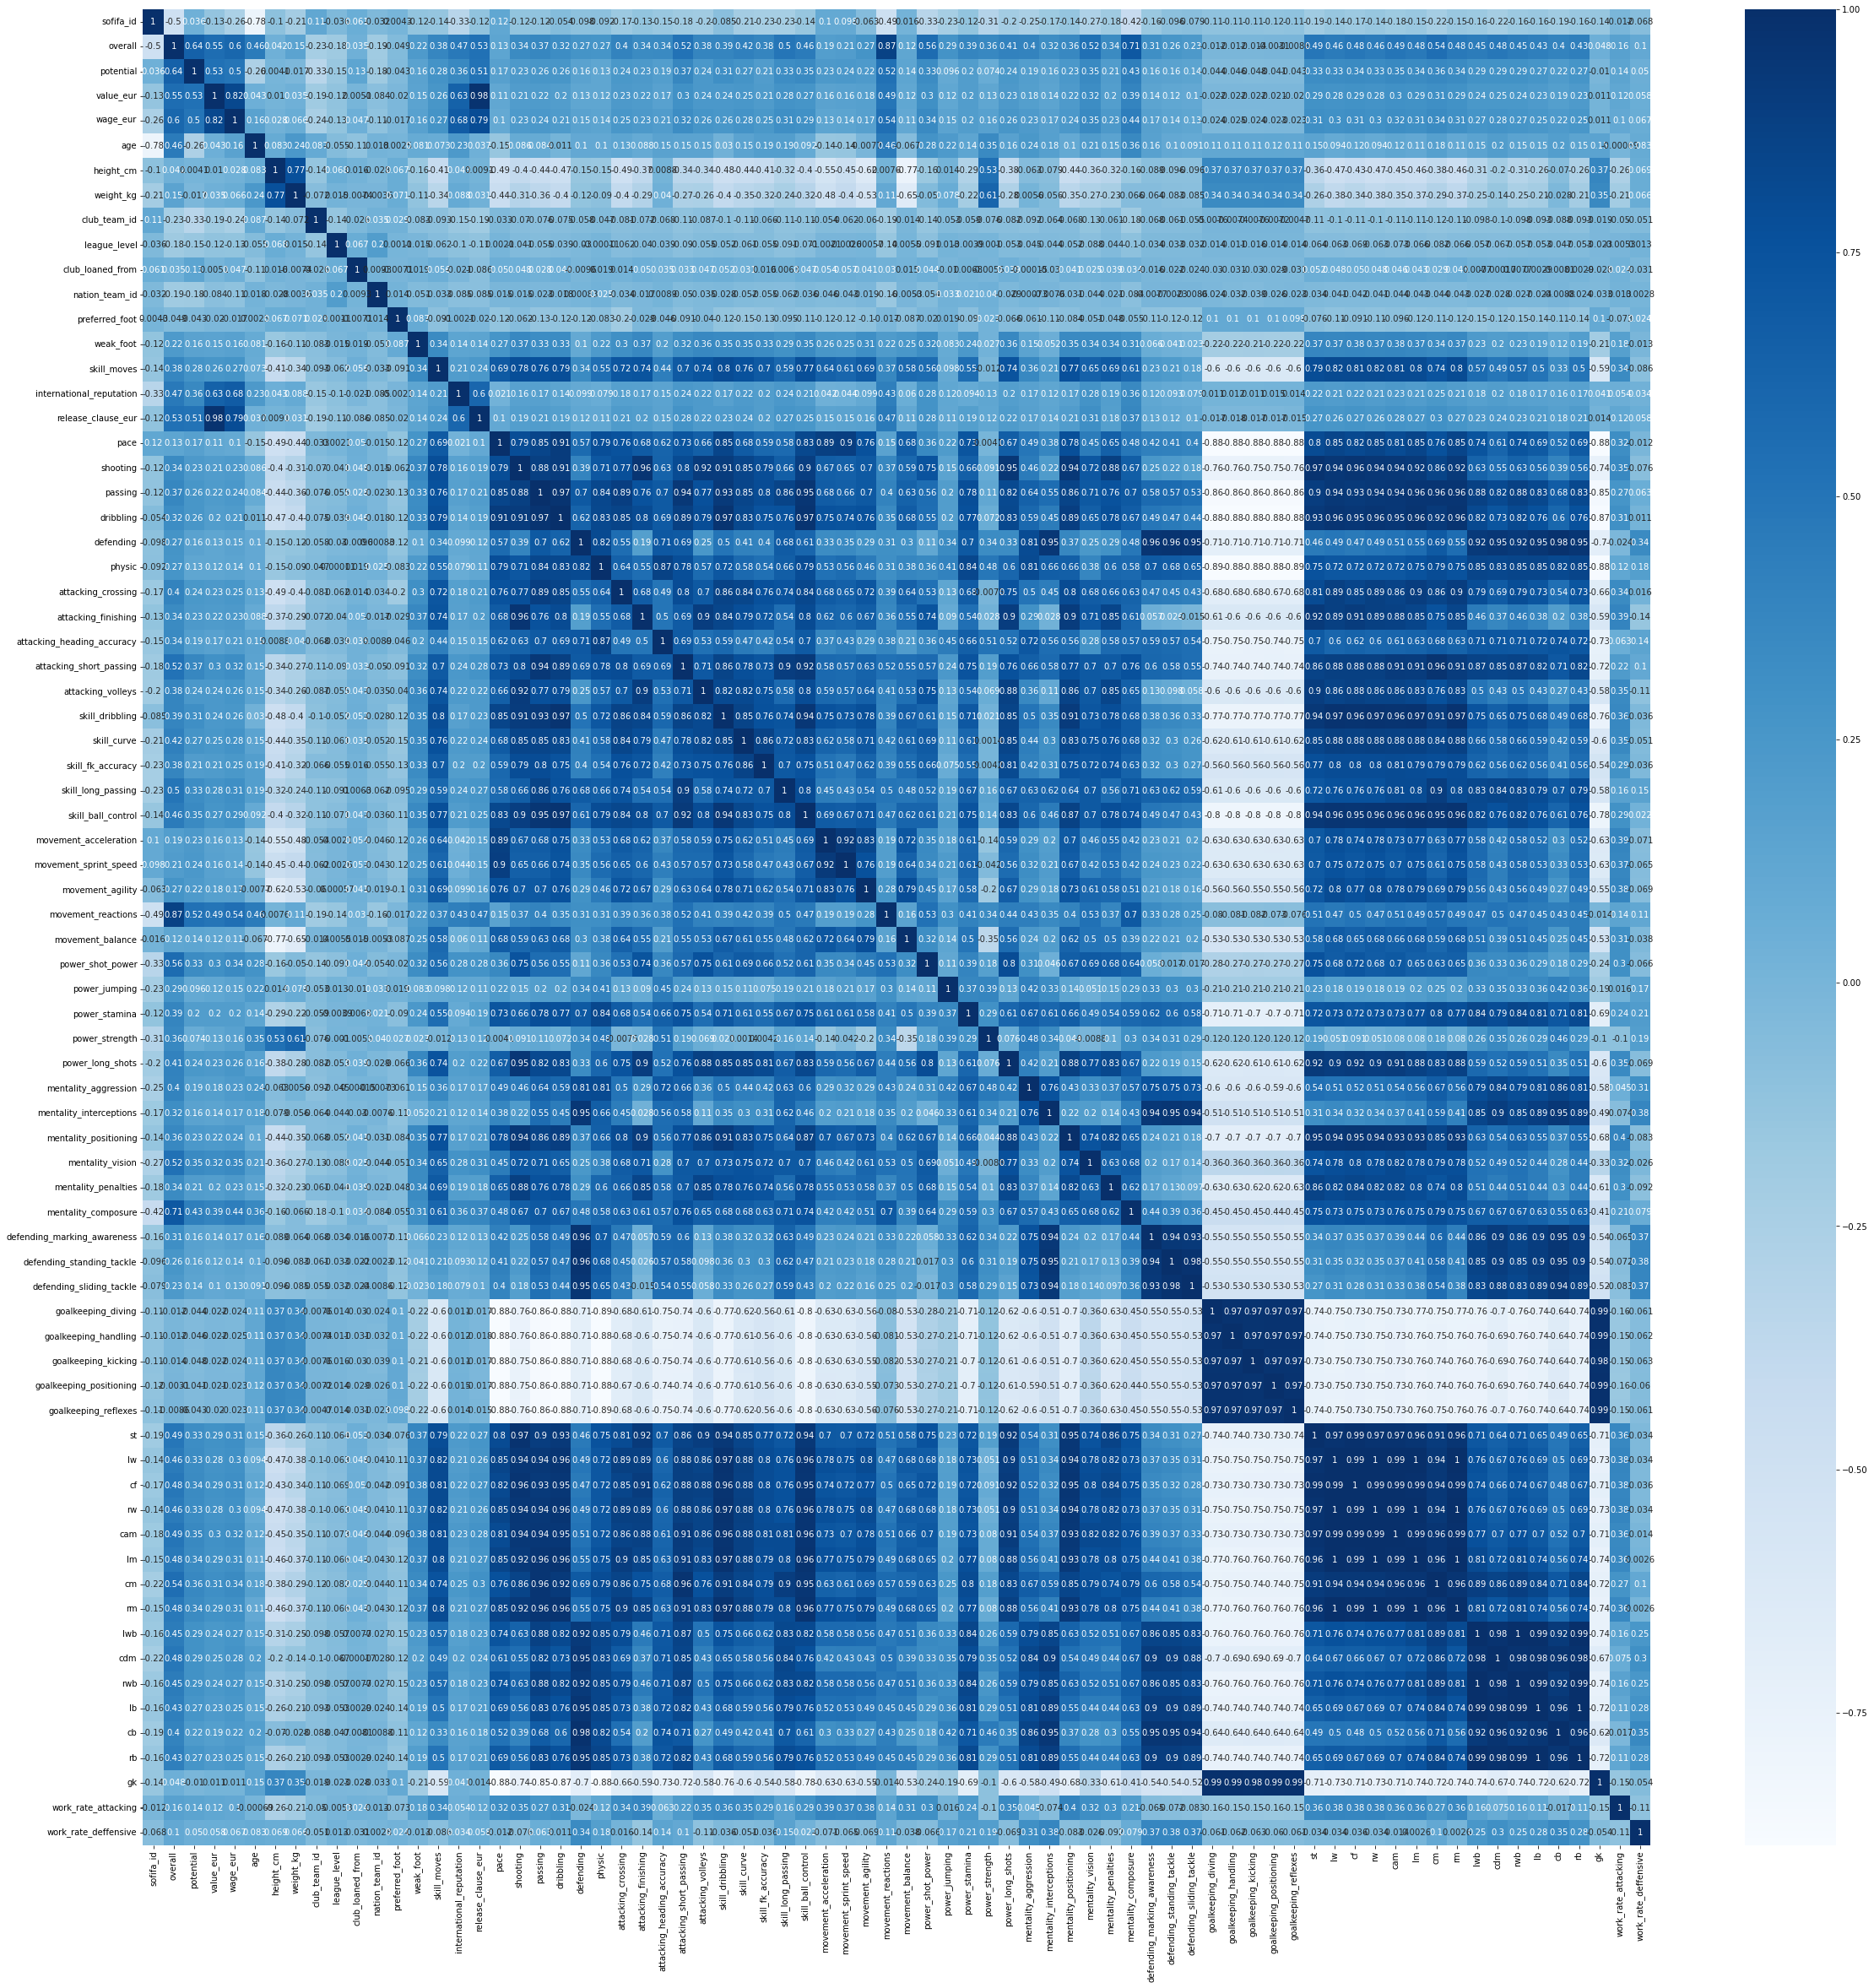

In [43]:
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

In [45]:
#otras columnas con correlación alta

In [47]:
diving_handling = fifa.goalkeeping_diving == fifa.goalkeeping_handling

In [48]:
diving_handling.value_counts()

False    17446
True      1719
dtype: int64

In [52]:
fifa[['goalkeeping_diving','goalkeeping_handling',
      'goalkeeping_kicking','goalkeeping_positioning',
     'goalkeeping_reflexes']]

goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
0                       6                    11                   15   
1                      15                     6                   12   
2                       7                    11                   15   
3                       9                     9                   15   
4                      15                    13                    5   
...                   ...                   ...                  ...   
19160                   6                    10                    5   
19161                  11                    12                    6   
19162                   8                     6                    7   
19163                   7                    10                    7   
19164                   8                    13                   13   

       goalkeeping_positioning  goalkeeping_reflexes  
0                           14                     8  
1                            8                    10  
2                           14                    11  
3                           15                    11  
4                           10                    13  
...                        ...                   ...  
19160                       15                    13  
19161                        8                    10  
19162                       10                     6  
19163                       14                    15  
19164                        9                    14  

[19165 rows x 5 columns]

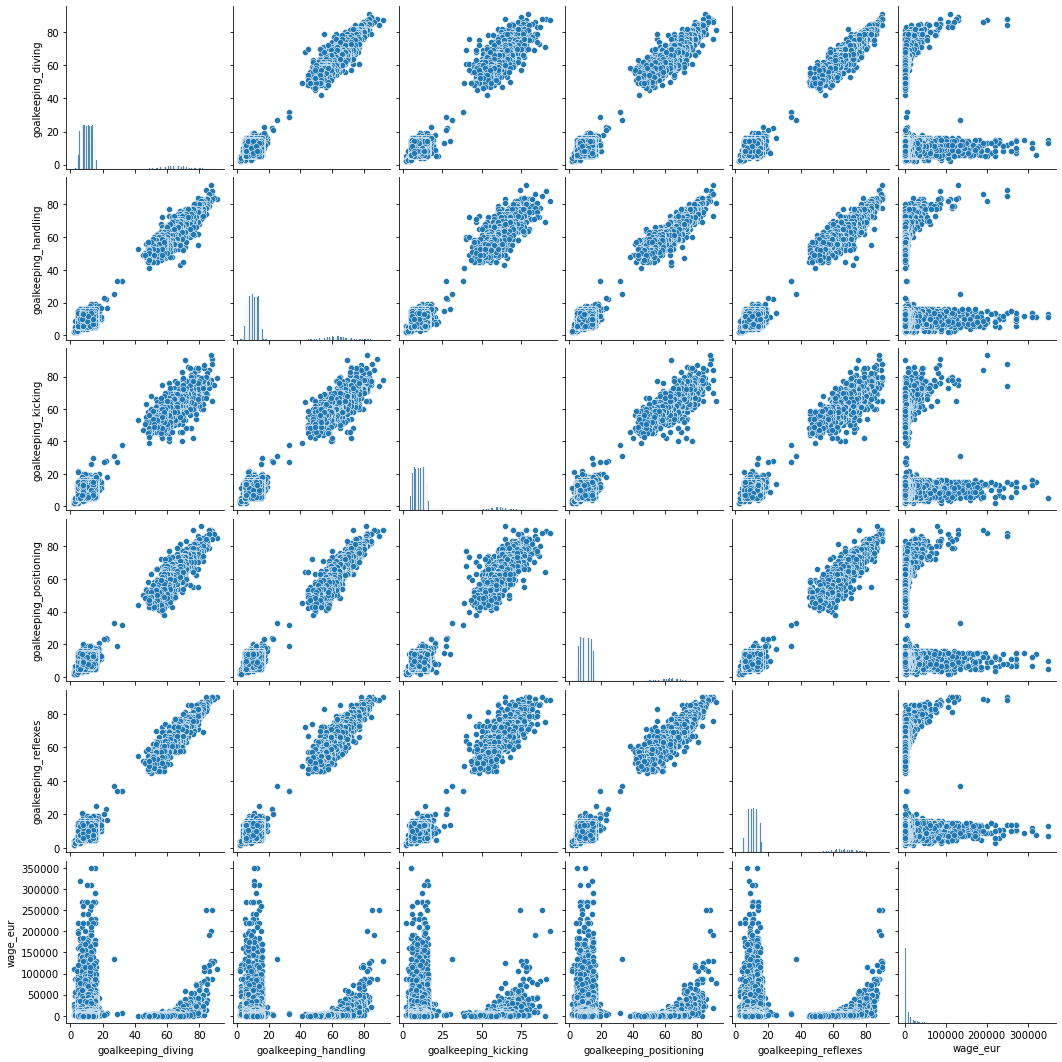

In [54]:
sns.pairplot(fifa[['goalkeeping_diving','goalkeeping_handling',
      'goalkeeping_kicking','goalkeeping_positioning',
     'goalkeeping_reflexes','wage_eur']])

In [56]:
# aunque los valores no coinciden como en el caso anterior, la correlación es clara.
# se podria dejar solo una de las variables y hacer drop del resto para reducir el ruido
# también son candidatas para CLUSTERING